In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df1= pd.read_excel('after_EDA_final3.xlsx')

In [3]:
df1['CR_CARD_OVERDUE_STATUS'].value_counts()

CR_CARD_OVERDUE_STATUS
G    22896
B     1979
Name: count, dtype: int64

In [4]:
df=df1.copy()

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
df.head()

Unnamed: 0   AVG_UTILIZE  CR_CARD_LIMIT CR_CARD_CUSCOUN CR_CARD_CSTATUS  \
0           0   1756.446667          20000       SRI LANKA            NORM   
1           2   7828.763333          50000       SRI LANKA            NORM   
2           3   1276.666667          24000       SRI LANKA            NORM   
3           4  20623.063333          42000       SRI LANKA            NORM   
4           6  16696.200000          90000       SRI LANKA            NORM   

   CR_CARD_VIP   STR_CR_CARD_NUM  CR_CARD_ARR CR_CARD_STAFF  \
0            0  4157380000039007            0             N   
1            0  4157380000060029            0             N   
2            0  4157380000066018            0             N   
3            0  4157380000072008            0             N   
4            0  4157380000089002            0             N   

  CR_EXPIRYDATESTATUS CR_CARD_STATUS  CR_CARD_MIN_AMT_DUE  \
0                   A           NORM               500.00   
1                   A           NORM                 0.00   
2                   A           NORM                 0.00   
3                   A           NORM                 0.00   
4                   A           NORM              1157.76   

  CR_CARD_OVERDUE_STATUS CR_CARD_CUSTITLE CR_CARD_CUSGENDER CR_CARD_CUSMARI  \
0                      G               MR                 M               M   
1                      G               MR                 M               M   
2                      G               MR                 M               M   
3                      G               MR                 M               M   
4                      G               MS                 F               M   

   CR_CARD_AMTARRS  CR_STANDORD_VALUE  CR_BANKDDAMOUNT       AVG_PAY  \
0              0.0                0.0              0.0   1000.000000   
1              0.0                0.0              0.0  84950.000000   
2              0.0                0.0              0.0   2000.000000   
3              0.0                0.0              0.0  32200.000000   
4              0.0                0.0              0.0  49666.666667   

      AVG_BALOS          NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  \
0  12486.126667  260445                 1               0   
1   2287.676667  210111                 1               0   
2  20851.670000  260721                 1               0   
3  33576.010000  260720                 1               0   
4  75133.396667  259916                 1               0   

   THREE_MONTH_BAL_OS_OD  CUSTOMER_PROFITABILITY  HOMELOAN_AMOUNT  \
0                    0.0                  -67.06              0.0   
1                    0.0                   13.70              0.0   
2                    0.0                  812.40              0.0   
3                    0.0                  148.78              0.0   
4                    0.0                  249.37              0.0   

   PERSONALLOAN_AMOUNT  NO_DEBIT_CARDS  DEBIT_CARD_USAGE     NII   AGE  \
0                  0.0               0               0.0  -67.06  80.0   
1                  0.0               4               0.0   13.70  63.0   
2                  0.0               0               0.0  812.40  61.0   
3                  0.0               3               0.0  128.78  56.0   
4                  0.0               1               0.0 -100.63  60.0   

      CC_AGE  CUSTOMER_DEBIT_ACC  CUSTOMER_DEBIT_ACC_BALANCE  \
0  26.083333                   3                        0.00   
1  26.000000                   0                        0.00   
2  26.000000                   1                    47205.46   
3  25.916667                   1                   170194.41   
4  25.916667                   1                    37060.15   

   CUSTOMER_CREDIT_ACC  CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  \
0                    0                          0.0               8.782233   
1                    0                          0.0              15.657527   
2                    0            

In [8]:
df.shape

(24875, 39)

In [9]:
df.head()

Unnamed: 0   AVG_UTILIZE  CR_CARD_LIMIT CR_CARD_CUSCOUN CR_CARD_CSTATUS  \
0           0   1756.446667          20000       SRI LANKA            NORM   
1           2   7828.763333          50000       SRI LANKA            NORM   
2           3   1276.666667          24000       SRI LANKA            NORM   
3           4  20623.063333          42000       SRI LANKA            NORM   
4           6  16696.200000          90000       SRI LANKA            NORM   

   CR_CARD_VIP   STR_CR_CARD_NUM  CR_CARD_ARR CR_CARD_STAFF  \
0            0  4157380000039007            0             N   
1            0  4157380000060029            0             N   
2            0  4157380000066018            0             N   
3            0  4157380000072008            0             N   
4            0  4157380000089002            0             N   

  CR_EXPIRYDATESTATUS CR_CARD_STATUS  CR_CARD_MIN_AMT_DUE  \
0                   A           NORM               500.00   
1                   A           NORM                 0.00   
2                   A           NORM                 0.00   
3                   A           NORM                 0.00   
4                   A           NORM              1157.76   

  CR_CARD_OVERDUE_STATUS CR_CARD_CUSTITLE CR_CARD_CUSGENDER CR_CARD_CUSMARI  \
0                      G               MR                 M               M   
1                      G               MR                 M               M   
2                      G               MR                 M               M   
3                      G               MR                 M               M   
4                      G               MS                 F               M   

   CR_CARD_AMTARRS  CR_STANDORD_VALUE  CR_BANKDDAMOUNT       AVG_PAY  \
0              0.0                0.0              0.0   1000.000000   
1              0.0                0.0              0.0  84950.000000   
2              0.0                0.0              0.0   2000.000000   
3              0.0                0.0              0.0  32200.000000   
4              0.0                0.0              0.0  49666.666667   

      AVG_BALOS          NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  \
0  12486.126667  260445                 1               0   
1   2287.676667  210111                 1               0   
2  20851.670000  260721                 1               0   
3  33576.010000  260720                 1               0   
4  75133.396667  259916                 1               0   

   THREE_MONTH_BAL_OS_OD  CUSTOMER_PROFITABILITY  HOMELOAN_AMOUNT  \
0                    0.0                  -67.06              0.0   
1                    0.0                   13.70              0.0   
2                    0.0                  812.40              0.0   
3                    0.0                  148.78              0.0   
4                    0.0                  249.37              0.0   

   PERSONALLOAN_AMOUNT  NO_DEBIT_CARDS  DEBIT_CARD_USAGE     NII   AGE  \
0                  0.0               0               0.0  -67.06  80.0   
1                  0.0               4               0.0   13.70  63.0   
2                  0.0               0               0.0  812.40  61.0   
3                  0.0               3               0.0  128.78  56.0   
4                  0.0               1               0.0 -100.63  60.0   

      CC_AGE  CUSTOMER_DEBIT_ACC  CUSTOMER_DEBIT_ACC_BALANCE  \
0  26.083333                   3                        0.00   
1  26.000000                   0                        0.00   
2  26.000000                   1                    47205.46   
3  25.916667                   1                   170194.41   
4  25.916667                   1                    37060.15   

   CUSTOMER_CREDIT_ACC  CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  \
0                    0                          0.0               8.782233   
1                    0                          0.0              15.657527   
2                    0            

In [10]:
# Drop the specified columns
df.drop(columns=[ 'NII'], inplace=True)

In [11]:
df.shape

(24875, 38)

In [12]:
df.drop(columns=[ 'AVG_UTILIZE','AVG_BALOS','CR_CARD_LIMIT','AVG_PAY'], inplace=True)

In [13]:
df.shape

(24875, 34)

In [14]:
df.dtypes

Unnamed: 0                       int64
CR_CARD_CUSCOUN                 object
CR_CARD_CSTATUS                 object
CR_CARD_VIP                      int64
STR_CR_CARD_NUM                  int64
CR_CARD_ARR                      int64
CR_CARD_STAFF                   object
CR_EXPIRYDATESTATUS             object
CR_CARD_STATUS                  object
CR_CARD_MIN_AMT_DUE            float64
CR_CARD_OVERDUE_STATUS          object
CR_CARD_CUSTITLE                object
CR_CARD_CUSGENDER               object
CR_CARD_CUSMARI                 object
CR_CARD_AMTARRS                float64
CR_STANDORD_VALUE              float64
CR_BANKDDAMOUNT                float64
                                 int64
NO_ACCOUNTS_CARD                 int64
NO_ACCOUNTS_OD                   int64
THREE_MONTH_BAL_OS_OD          float64
CUSTOMER_PROFITABILITY         float64
HOMELOAN_AMOUNT                float64
PERSONALLOAN_AMOUNT            float64
NO_DEBIT_CARDS                   int64
DEBIT_CARD_USAGE         

In [15]:
df.shape

(24875, 34)

In [16]:
df.isna().sum()

Unnamed: 0                     0
CR_CARD_CUSCOUN                0
CR_CARD_CSTATUS                0
CR_CARD_VIP                    0
STR_CR_CARD_NUM                0
CR_CARD_ARR                    0
CR_CARD_STAFF                  0
CR_EXPIRYDATESTATUS            0
CR_CARD_STATUS                 0
CR_CARD_MIN_AMT_DUE            0
CR_CARD_OVERDUE_STATUS         0
CR_CARD_CUSTITLE               0
CR_CARD_CUSGENDER              0
CR_CARD_CUSMARI                0
CR_CARD_AMTARRS                0
CR_STANDORD_VALUE              0
CR_BANKDDAMOUNT                0
                               0
NO_ACCOUNTS_CARD               0
NO_ACCOUNTS_OD                 0
THREE_MONTH_BAL_OS_OD          0
CUSTOMER_PROFITABILITY         0
HOMELOAN_AMOUNT                0
PERSONALLOAN_AMOUNT            0
NO_DEBIT_CARDS                 0
DEBIT_CARD_USAGE               0
AGE                            0
CC_AGE                         0
CUSTOMER_DEBIT_ACC             0
CUSTOMER_DEBIT_ACC_BALANCE     0
CUSTOMER_C

#### LABEL ENCODING

In [17]:
def cus_country(x):
    
    if (x =='SRI LANKA'):
        return 0
    
    else:
        return 1



df['CR_CARD_CUSCOUN']=df['CR_CARD_CUSCOUN'].apply(cus_country)

In [18]:
def cus_over(x):
    
    if (x =='B'):
        return 0
    
    else:
        return 1



df['CR_CARD_OVERDUE_STATUS']=df['CR_CARD_OVERDUE_STATUS'].apply(cus_over)

In [19]:
def cus_country(x):
    
    if (x =='F'):
        return 0
    
    else:
        return 1



df['CR_CARD_CUSGENDER']=df['CR_CARD_CUSGENDER'].apply(cus_country)

In [20]:
def married_status(x):
    
    if (x =='S'):
        return 1
    
    elif (x =='M'):
        return 2
    
    elif (x =='D'):
        return 3
    
    elif (x =='W'):
        return 4
    
    else:
        return 5



df['CR_CARD_CUSMARI']=df['CR_CARD_CUSMARI'].apply(married_status)

In [21]:
def title(x):
    
    if (x =='MR'):
        return 1
    
    elif (x =='MRS'):
        return 2
    
    elif (x =='MISS'):
        return 3
    
    elif (x =='DR'):
        return 4
    
    elif (x =='DR MRS'):
        return 4
    
    elif (x =='MS'):
        return 5
    
    elif (x =='REV'):
        return 6
    
    elif (x =='PROF'):
        return 7
    
    elif (x =='CAPT.'):
        return 8
    
    elif (x =='MAJOR'):
        return 9
    
    else:
        return 10



df['CR_CARD_CUSTITLE']=df['CR_CARD_CUSTITLE'].apply(title)

In [22]:
df.head()

Unnamed: 0  CR_CARD_CUSCOUN CR_CARD_CSTATUS  CR_CARD_VIP   STR_CR_CARD_NUM  \
0           0                0            NORM            0  4157380000039007   
1           2                0            NORM            0  4157380000060029   
2           3                0            NORM            0  4157380000066018   
3           4                0            NORM            0  4157380000072008   
4           6                0            NORM            0  4157380000089002   

   CR_CARD_ARR CR_CARD_STAFF CR_EXPIRYDATESTATUS CR_CARD_STATUS  \
0            0             N                   A           NORM   
1            0             N                   A           NORM   
2            0             N                   A           NORM   
3            0             N                   A           NORM   
4            0             N                   A           NORM   

   CR_CARD_MIN_AMT_DUE  CR_CARD_OVERDUE_STATUS  CR_CARD_CUSTITLE  \
0               500.00                       1                 1   
1                 0.00                       1                 1   
2                 0.00                       1                 1   
3                 0.00                       1                 1   
4              1157.76                       1                 5   

   CR_CARD_CUSGENDER  CR_CARD_CUSMARI  CR_CARD_AMTARRS  CR_STANDORD_VALUE  \
0                  1                2              0.0                0.0   
1                  1                2              0.0                0.0   
2                  1                2              0.0                0.0   
3                  1                2              0.0                0.0   
4                  0                2              0.0                0.0   

   CR_BANKDDAMOUNT          NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  \
0              0.0  260445                 1               0   
1              0.0  210111                 1               0   
2              0.0  260721                 1               0   
3              0.0  260720                 1               0   
4              0.0  259916                 1               0   

   THREE_MONTH_BAL_OS_OD  CUSTOMER_PROFITABILITY  HOMELOAN_AMOUNT  \
0                    0.0                  -67.06              0.0   
1                    0.0                   13.70              0.0   
2                    0.0                  812.40              0.0   
3                    0.0                  148.78              0.0   
4                    0.0                  249.37              0.0   

   PERSONALLOAN_AMOUNT  NO_DEBIT_CARDS  DEBIT_CARD_USAGE   AGE     CC_AGE  \
0                  0.0               0               0.0  80.0  26.083333   
1                  0.0               4               0.0  63.0  26.000000   
2                  0.0               0               0.0  61.0  26.000000   
3                  0.0               3               0.0  56.0  25.916667   
4                  0.0               1               0.0  60.0  25.916667   

   CUSTOMER_DEBIT_ACC  CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                   3                        0.00                    0   
1                   0                        0.00                    0   
2                   1                    47205.46                    0   
3                   1                   170194.41                    0   
4                   1                    37060.15                    0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  
0                          0.0               8.782233     8.008889  
1                          0.0              15.657527  3713.374413  
2                          0.0               5.319444     9.591558  
3                          0.0              49.102532    95.901806  
4                          0.0              18.551333    66.104647

In [23]:
df.dtypes

Unnamed: 0                       int64
CR_CARD_CUSCOUN                  int64
CR_CARD_CSTATUS                 object
CR_CARD_VIP                      int64
STR_CR_CARD_NUM                  int64
CR_CARD_ARR                      int64
CR_CARD_STAFF                   object
CR_EXPIRYDATESTATUS             object
CR_CARD_STATUS                  object
CR_CARD_MIN_AMT_DUE            float64
CR_CARD_OVERDUE_STATUS           int64
CR_CARD_CUSTITLE                 int64
CR_CARD_CUSGENDER                int64
CR_CARD_CUSMARI                  int64
CR_CARD_AMTARRS                float64
CR_STANDORD_VALUE              float64
CR_BANKDDAMOUNT                float64
                                 int64
NO_ACCOUNTS_CARD                 int64
NO_ACCOUNTS_OD                   int64
THREE_MONTH_BAL_OS_OD          float64
CUSTOMER_PROFITABILITY         float64
HOMELOAN_AMOUNT                float64
PERSONALLOAN_AMOUNT            float64
NO_DEBIT_CARDS                   int64
DEBIT_CARD_USAGE         

In [24]:
# Convert 'CR_STANDORD_VALUE' column to string type
df['CR_STANDORD_VALUE'] = df['CR_STANDORD_VALUE'].astype(str)

# Remove commas from 'CR_STANDORD_VALUE' column
df['CR_STANDORD_VALUE'] = df['CR_STANDORD_VALUE'].str.replace(',', '')

# Convert 'CR_STANDORD_VALUE' column to float
df['CR_STANDORD_VALUE'] = df['CR_STANDORD_VALUE'].astype(float)


In [25]:
df.dtypes

Unnamed: 0                       int64
CR_CARD_CUSCOUN                  int64
CR_CARD_CSTATUS                 object
CR_CARD_VIP                      int64
STR_CR_CARD_NUM                  int64
CR_CARD_ARR                      int64
CR_CARD_STAFF                   object
CR_EXPIRYDATESTATUS             object
CR_CARD_STATUS                  object
CR_CARD_MIN_AMT_DUE            float64
CR_CARD_OVERDUE_STATUS           int64
CR_CARD_CUSTITLE                 int64
CR_CARD_CUSGENDER                int64
CR_CARD_CUSMARI                  int64
CR_CARD_AMTARRS                float64
CR_STANDORD_VALUE              float64
CR_BANKDDAMOUNT                float64
                                 int64
NO_ACCOUNTS_CARD                 int64
NO_ACCOUNTS_OD                   int64
THREE_MONTH_BAL_OS_OD          float64
CUSTOMER_PROFITABILITY         float64
HOMELOAN_AMOUNT                float64
PERSONALLOAN_AMOUNT            float64
NO_DEBIT_CARDS                   int64
DEBIT_CARD_USAGE         

In [26]:
df_encode= pd.get_dummies(df, columns=['CR_CARD_CUSMARI'],drop_first=True)


In [27]:
df_encode= pd.get_dummies(df_encode, columns=['CR_CARD_CUSTITLE'],drop_first=True)


In [28]:
df_encode.shape

(24875, 45)

In [29]:
df_encode.head()

Unnamed: 0  CR_CARD_CUSCOUN CR_CARD_CSTATUS  CR_CARD_VIP   STR_CR_CARD_NUM  \
0           0                0            NORM            0  4157380000039007   
1           2                0            NORM            0  4157380000060029   
2           3                0            NORM            0  4157380000066018   
3           4                0            NORM            0  4157380000072008   
4           6                0            NORM            0  4157380000089002   

   CR_CARD_ARR CR_CARD_STAFF CR_EXPIRYDATESTATUS CR_CARD_STATUS  \
0            0             N                   A           NORM   
1            0             N                   A           NORM   
2            0             N                   A           NORM   
3            0             N                   A           NORM   
4            0             N                   A           NORM   

   CR_CARD_MIN_AMT_DUE  CR_CARD_OVERDUE_STATUS  CR_CARD_CUSGENDER  \
0               500.00                       1                  1   
1                 0.00                       1                  1   
2                 0.00                       1                  1   
3                 0.00                       1                  1   
4              1157.76                       1                  0   

   CR_CARD_AMTARRS  CR_STANDORD_VALUE  CR_BANKDDAMOUNT          \
0              0.0                0.0              0.0  260445   
1              0.0                0.0              0.0  210111   
2              0.0                0.0              0.0  260721   
3              0.0                0.0              0.0  260720   
4              0.0                0.0              0.0  259916   

   NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  \
0                 1               0                    0.0   
1                 1               0                    0.0   
2                 1               0                    0.0   
3                 1               0                    0.0   
4                 1               0                    0.0   

   CUSTOMER_PROFITABILITY  HOMELOAN_AMOUNT  PERSONALLOAN_AMOUNT  \
0                  -67.06              0.0                  0.0   
1                   13.70              0.0                  0.0   
2                  812.40              0.0                  0.0   
3                  148.78              0.0                  0.0   
4                  249.37              0.0                  0.0   

   NO_DEBIT_CARDS  DEBIT_CARD_USAGE   AGE     CC_AGE  CUSTOMER_DEBIT_ACC  \
0               0               0.0  80.0  26.083333                   3   
1               4               0.0  63.0  26.000000                   0   
2               0               0.0  61.0  26.000000                   1   
3               3               0.0  56.0  25.916667                   1   
4               1               0.0  60.0  25.916667                   1   

   CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                        0.00                    0   
1                        0.00                    0   
2                    47205.46                    0   
3                   170194.41                    0   
4                    37060.15                    0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  \
0                          0.0               8.782233     8.008889   
1                          0.0              15.657527  3713.374413   
2                          0.0               5.319444     9.591558   
3                          0.0              49.102532    95.901806   
4                          0.0              18.551333    66.104647   

   CR_CARD_CUSMARI_2  CR_CARD_CUSMARI_3  CR_CARD_CUSMARI_4  CR_CARD_CUSMARI_5  \
0               True              False              False              False   
1               True              False              False              False   
2               True              False              False              False  

In [30]:
# Assuming df is your DataFrame after dummy encoding
df_encode['CR_CARD_CUSMARI_2'] = df_encode['CR_CARD_CUSMARI_2'].astype(int)
df_encode['CR_CARD_CUSMARI_3'] = df_encode['CR_CARD_CUSMARI_3'].astype(int)
df_encode['CR_CARD_CUSMARI_4'] = df_encode['CR_CARD_CUSMARI_4'].astype(int)
df_encode['CR_CARD_CUSMARI_5'] = df_encode['CR_CARD_CUSMARI_5'].astype(int)
df_encode['CR_CARD_CUSTITLE_2'] = df_encode['CR_CARD_CUSTITLE_2'].astype(int)
df_encode['CR_CARD_CUSTITLE_3'] = df_encode['CR_CARD_CUSTITLE_3'].astype(int)
df_encode['CR_CARD_CUSTITLE_4'] = df_encode['CR_CARD_CUSTITLE_4'].astype(int)
df_encode['CR_CARD_CUSTITLE_5'] = df_encode['CR_CARD_CUSTITLE_5'].astype(int)
df_encode['CR_CARD_CUSTITLE_6'] = df_encode['CR_CARD_CUSTITLE_6'].astype(int)
df_encode['CR_CARD_CUSTITLE_7'] = df_encode['CR_CARD_CUSTITLE_7'].astype(int)
df_encode['CR_CARD_CUSTITLE_8'] = df_encode['CR_CARD_CUSTITLE_8'].astype(int)
df_encode['CR_CARD_CUSTITLE_9'] = df_encode['CR_CARD_CUSTITLE_9'].astype(int)
df_encode['CR_CARD_CUSTITLE_10'] = df_encode['CR_CARD_CUSTITLE_10'].astype(int)

# Now, the columns will contain 0s and 1s instead of True and False


In [31]:
df_encode.head()

Unnamed: 0  CR_CARD_CUSCOUN CR_CARD_CSTATUS  CR_CARD_VIP   STR_CR_CARD_NUM  \
0           0                0            NORM            0  4157380000039007   
1           2                0            NORM            0  4157380000060029   
2           3                0            NORM            0  4157380000066018   
3           4                0            NORM            0  4157380000072008   
4           6                0            NORM            0  4157380000089002   

   CR_CARD_ARR CR_CARD_STAFF CR_EXPIRYDATESTATUS CR_CARD_STATUS  \
0            0             N                   A           NORM   
1            0             N                   A           NORM   
2            0             N                   A           NORM   
3            0             N                   A           NORM   
4            0             N                   A           NORM   

   CR_CARD_MIN_AMT_DUE  CR_CARD_OVERDUE_STATUS  CR_CARD_CUSGENDER  \
0               500.00                       1                  1   
1                 0.00                       1                  1   
2                 0.00                       1                  1   
3                 0.00                       1                  1   
4              1157.76                       1                  0   

   CR_CARD_AMTARRS  CR_STANDORD_VALUE  CR_BANKDDAMOUNT          \
0              0.0                0.0              0.0  260445   
1              0.0                0.0              0.0  210111   
2              0.0                0.0              0.0  260721   
3              0.0                0.0              0.0  260720   
4              0.0                0.0              0.0  259916   

   NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  \
0                 1               0                    0.0   
1                 1               0                    0.0   
2                 1               0                    0.0   
3                 1               0                    0.0   
4                 1               0                    0.0   

   CUSTOMER_PROFITABILITY  HOMELOAN_AMOUNT  PERSONALLOAN_AMOUNT  \
0                  -67.06              0.0                  0.0   
1                   13.70              0.0                  0.0   
2                  812.40              0.0                  0.0   
3                  148.78              0.0                  0.0   
4                  249.37              0.0                  0.0   

   NO_DEBIT_CARDS  DEBIT_CARD_USAGE   AGE     CC_AGE  CUSTOMER_DEBIT_ACC  \
0               0               0.0  80.0  26.083333                   3   
1               4               0.0  63.0  26.000000                   0   
2               0               0.0  61.0  26.000000                   1   
3               3               0.0  56.0  25.916667                   1   
4               1               0.0  60.0  25.916667                   1   

   CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                        0.00                    0   
1                        0.00                    0   
2                    47205.46                    0   
3                   170194.41                    0   
4                    37060.15                    0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  \
0                          0.0               8.782233     8.008889   
1                          0.0              15.657527  3713.374413   
2                          0.0               5.319444     9.591558   
3                          0.0              49.102532    95.901806   
4                          0.0              18.551333    66.104647   

   CR_CARD_CUSMARI_2  CR_CARD_CUSMARI_3  CR_CARD_CUSMARI_4  CR_CARD_CUSMARI_5  \
0                  1                  0                  0                  0   
1                  1                  0                  0                  0   
2                  1                  0                  0                  0  

In [32]:
df_encode['CR_STANDORD_VALUE'].value_counts()

CR_STANDORD_VALUE
0.0       24830
50.0         13
10.0         12
25.0          8
20.0          6
40.0          1
500.0         1
5.0           1
8000.0        1
2500.0        1
100.0         1
Name: count, dtype: int64

In [33]:
df_encode.columns

Index(['Unnamed: 0', 'CR_CARD_CUSCOUN', 'CR_CARD_CSTATUS', 'CR_CARD_VIP',
       'STR_CR_CARD_NUM', 'CR_CARD_ARR', 'CR_CARD_STAFF',
       'CR_EXPIRYDATESTATUS', 'CR_CARD_STATUS', 'CR_CARD_MIN_AMT_DUE',
       'CR_CARD_OVERDUE_STATUS', 'CR_CARD_CUSGENDER', 'CR_CARD_AMTARRS',
       'CR_STANDORD_VALUE', 'CR_BANKDDAMOUNT', '   ', 'NO_ACCOUNTS_CARD',
       'NO_ACCOUNTS_OD', 'THREE_MONTH_BAL_OS_OD', 'CUSTOMER_PROFITABILITY',
       'HOMELOAN_AMOUNT', 'PERSONALLOAN_AMOUNT', 'NO_DEBIT_CARDS',
       'DEBIT_CARD_USAGE', 'AGE', 'CC_AGE', 'CUSTOMER_DEBIT_ACC',
       'CUSTOMER_DEBIT_ACC_BALANCE', 'CUSTOMER_CREDIT_ACC',
       'CUSTOMER_CREDIT_ACC_BALANCE', 'AVG_LIMIT_UTILIZATION', 'PAYMENT_AVG',
       'CR_CARD_CUSMARI_2', 'CR_CARD_CUSMARI_3', 'CR_CARD_CUSMARI_4',
       'CR_CARD_CUSMARI_5', 'CR_CARD_CUSTITLE_2', 'CR_CARD_CUSTITLE_3',
       'CR_CARD_CUSTITLE_4', 'CR_CARD_CUSTITLE_5', 'CR_CARD_CUSTITLE_6',
       'CR_CARD_CUSTITLE_7', 'CR_CARD_CUSTITLE_8', 'CR_CARD_CUSTITLE_9',
       'CR_CARD

In [34]:
df_encode['CR_STANDORD_VALUE']=df_encode['CR_STANDORD_VALUE'].fillna(0)

In [35]:
#continuous_df=df_encode[['AGE', 'CR_CARD_LIMIT', 'AVG_PAY', 'AVG_BALOS',
       #'AVG_UTILIZE', 'Age_months', 'CR_CARD_ARR',
       #'CR_CARD_MIN_AMT_DUE', 'CR_CARD_AMTARRS',
       #'CR_STANDORD_VALUE', 'CR_AUTHBONUS', 'CR_BANKDDAMOUNT',
       #'NO_ACCOUNTS_CARD', 'NO_ACCOUNTS_OD', 'SIX_MONTH_BAL_OS_OD',
       #'CUSTOMER_PROFITABILITY', 'HOMELOAN_AMOUNT', 'PERSONALLOAN_AMOUNT',
       #'NO_DEBIT_CARDS', 'DEBIT_CARD_USAGE', 'NII', 'CUSTOMER_DEBIT_ACC',
       #'CUSTOMER_DEBIT_ACC_BALANCE', 'CUSTOMER_CREDIT_ACC',
       #'CUSTOMER_CREDIT_ACC_BALANCE' ]]
        
continuous_df=df_encode[[
         'CR_CARD_ARR','CC_AGE','AGE',
        'CR_CARD_AMTARRS',
       'CR_STANDORD_VALUE',
       'NO_ACCOUNTS_CARD', 'NO_ACCOUNTS_OD', 'THREE_MONTH_BAL_OS_OD',
       'CUSTOMER_PROFITABILITY', 'PERSONALLOAN_AMOUNT',
       'NO_DEBIT_CARDS', 'DEBIT_CARD_USAGE', 'CUSTOMER_DEBIT_ACC',
       'CUSTOMER_DEBIT_ACC_BALANCE', 'CUSTOMER_CREDIT_ACC',
       'CUSTOMER_CREDIT_ACC_BALANCE','AVG_LIMIT_UTILIZATION','PAYMENT_AVG']]

In [36]:
continuous_df.dtypes

CR_CARD_ARR                      int64
CC_AGE                         float64
AGE                            float64
CR_CARD_AMTARRS                float64
CR_STANDORD_VALUE              float64
NO_ACCOUNTS_CARD                 int64
NO_ACCOUNTS_OD                   int64
THREE_MONTH_BAL_OS_OD          float64
CUSTOMER_PROFITABILITY         float64
PERSONALLOAN_AMOUNT            float64
NO_DEBIT_CARDS                   int64
DEBIT_CARD_USAGE               float64
CUSTOMER_DEBIT_ACC               int64
CUSTOMER_DEBIT_ACC_BALANCE     float64
CUSTOMER_CREDIT_ACC              int64
CUSTOMER_CREDIT_ACC_BALANCE    float64
AVG_LIMIT_UTILIZATION          float64
PAYMENT_AVG                    float64
dtype: object

In [37]:
from sklearn.preprocessing import MinMaxScaler
a = 0
b = 1

# Initialize the MinMaxScaler with the custom feature_range
scaler = MinMaxScaler(feature_range=(a, b))
mm_data=scaler.fit_transform(continuous_df)



In [38]:
mm_data=pd.DataFrame(mm_data,columns=continuous_df.columns)
mm_data.head()

CR_CARD_ARR    CC_AGE     AGE  CR_CARD_AMTARRS  CR_STANDORD_VALUE  \
0          0.0  0.970968  0.7750              1.0                0.0   
1          0.0  0.967742  0.5625              1.0                0.0   
2          0.0  0.967742  0.5375              1.0                0.0   
3          0.0  0.964516  0.4750              1.0                0.0   
4          0.0  0.964516  0.5250              1.0                0.0   

   NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  \
0          0.038462             0.0               0.007852   
1          0.038462             0.0               0.007852   
2          0.038462             0.0               0.007852   
3          0.038462             0.0               0.007852   
4          0.038462             0.0               0.007852   

   CUSTOMER_PROFITABILITY  PERSONALLOAN_AMOUNT  NO_DEBIT_CARDS  \
0                0.542052                  0.0        0.000000   
1                0.542065                  0.0        0.235294   
2                0.542187                  0.0        0.000000   
3                0.542085                  0.0        0.176471   
4                0.542101                  0.0        0.058824   

   DEBIT_CARD_USAGE  CUSTOMER_DEBIT_ACC  CUSTOMER_DEBIT_ACC_BALANCE  \
0               0.0              0.0375                    0.000000   
1               0.0              0.0000                    0.000000   
2               0.0              0.0125                    0.000031   
3               0.0              0.0125                    0.000112   
4               0.0              0.0125                    0.000024   

   CUSTOMER_CREDIT_ACC  CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  \
0                  0.0                          0.0               0.007264   
1                  0.0                          0.0               0.020468   
2                  0.0                          0.0               0.000613   
3                  0.0                          0.0               0.084698   
4                  0.0                          0.0               0.026025   

   PAYMENT_AVG  
0     0.005120  
1     0.005313  
2     0.005120  
3     0.005124  
4     0.005123

In [39]:
mm_data.shape

(24875, 18)

In [40]:
selected_columns = df_encode[['CR_CARD_CUSGENDER','CR_CARD_CUSCOUN','CR_CARD_CUSMARI_2', 'CR_CARD_CUSMARI_3',
       'CR_CARD_CUSMARI_4', 'CR_CARD_CUSMARI_5', 'CR_CARD_CUSTITLE_2',
       'CR_CARD_CUSTITLE_3', 'CR_CARD_CUSTITLE_4', 'CR_CARD_CUSTITLE_5',
       'CR_CARD_CUSTITLE_6', 'CR_CARD_CUSTITLE_7', 'CR_CARD_CUSTITLE_8',
       'CR_CARD_CUSTITLE_9', 'CR_CARD_CUSTITLE_10','CR_CARD_OVERDUE_STATUS']]

df_mm = pd.concat([mm_data, selected_columns], axis=1)

In [41]:
df_mm.shape

(24875, 34)

In [42]:
df_mm.head()

CR_CARD_ARR    CC_AGE     AGE  CR_CARD_AMTARRS  CR_STANDORD_VALUE  \
0          0.0  0.970968  0.7750              1.0                0.0   
1          0.0  0.967742  0.5625              1.0                0.0   
2          0.0  0.967742  0.5375              1.0                0.0   
3          0.0  0.964516  0.4750              1.0                0.0   
4          0.0  0.964516  0.5250              1.0                0.0   

   NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  \
0          0.038462             0.0               0.007852   
1          0.038462             0.0               0.007852   
2          0.038462             0.0               0.007852   
3          0.038462             0.0               0.007852   
4          0.038462             0.0               0.007852   

   CUSTOMER_PROFITABILITY  PERSONALLOAN_AMOUNT  NO_DEBIT_CARDS  \
0                0.542052                  0.0        0.000000   
1                0.542065                  0.0        0.235294   
2                0.542187                  0.0        0.000000   
3                0.542085                  0.0        0.176471   
4                0.542101                  0.0        0.058824   

   DEBIT_CARD_USAGE  CUSTOMER_DEBIT_ACC  CUSTOMER_DEBIT_ACC_BALANCE  \
0               0.0              0.0375                    0.000000   
1               0.0              0.0000                    0.000000   
2               0.0              0.0125                    0.000031   
3               0.0              0.0125                    0.000112   
4               0.0              0.0125                    0.000024   

   CUSTOMER_CREDIT_ACC  CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  \
0                  0.0                          0.0               0.007264   
1                  0.0                          0.0               0.020468   
2                  0.0                          0.0               0.000613   
3                  0.0                          0.0               0.084698   
4                  0.0                          0.0               0.026025   

   PAYMENT_AVG  CR_CARD_CUSGENDER  CR_CARD_CUSCOUN  CR_CARD_CUSMARI_2  \
0     0.005120                  1                0                  1   
1     0.005313                  1                0                  1   
2     0.005120                  1                0                  1   
3     0.005124                  1                0                  1   
4     0.005123                  0                0                  1   

   CR_CARD_CUSMARI_3  CR_CARD_CUSMARI_4  CR_CARD_CUSMARI_5  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  0   

   CR_CARD_CUSTITLE_2  CR_CARD_CUSTITLE_3  CR_CARD_CUSTITLE_4  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   CR_CARD_CUSTITLE_5  CR_CARD_CUSTITLE_6  CR_CARD_CUSTITLE_7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   1                   0                   0   

   CR_CARD_CUSTITLE_8  CR_CARD_CUSTITLE_9  CR_CARD_CUSTITLE_10  \
0                   0                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0     

In [43]:
df_mm.shape

(24875, 34)

In [44]:
df_mm.isna().sum()

CR_CARD_ARR                    0
CC_AGE                         0
AGE                            0
CR_CARD_AMTARRS                0
CR_STANDORD_VALUE              0
NO_ACCOUNTS_CARD               0
NO_ACCOUNTS_OD                 0
THREE_MONTH_BAL_OS_OD          0
CUSTOMER_PROFITABILITY         0
PERSONALLOAN_AMOUNT            0
NO_DEBIT_CARDS                 0
DEBIT_CARD_USAGE               0
CUSTOMER_DEBIT_ACC             0
CUSTOMER_DEBIT_ACC_BALANCE     0
CUSTOMER_CREDIT_ACC            0
CUSTOMER_CREDIT_ACC_BALANCE    0
AVG_LIMIT_UTILIZATION          0
PAYMENT_AVG                    0
CR_CARD_CUSGENDER              0
CR_CARD_CUSCOUN                0
CR_CARD_CUSMARI_2              0
CR_CARD_CUSMARI_3              0
CR_CARD_CUSMARI_4              0
CR_CARD_CUSMARI_5              0
CR_CARD_CUSTITLE_2             0
CR_CARD_CUSTITLE_3             0
CR_CARD_CUSTITLE_4             0
CR_CARD_CUSTITLE_5             0
CR_CARD_CUSTITLE_6             0
CR_CARD_CUSTITLE_7             0
CR_CARD_CU

In [45]:
df_mm['AVG_LIMIT_UTILIZATION']=df_mm['AVG_LIMIT_UTILIZATION'].fillna(0)

In [46]:
X = df_mm.drop('CR_CARD_OVERDUE_STATUS', axis=1)
y =df_mm['CR_CARD_OVERDUE_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
X_test.shape

(7463, 33)

In [48]:
# Step 3: Apply SMOTE to the training set


from imblearn.over_sampling import RandomOverSampler
over_sam = RandomOverSampler(random_state=42)
X_train_resample, y_train_resample = over_sam.fit_resample(X_train, y_train)

In [49]:
# Assuming you have already imported necessary libraries and performed the train-test split and oversampling

from collections import Counter

# Value counts of the original y_train
print("Original Class Distribution:")
print(y_train.value_counts())

# Value counts of the resampled y_train_resample
print("\nResampled Class Distribution:")
print(pd.Series(y_train_resample).value_counts())

# If you want to check the value counts of the X_train_resample, you can do it similarly


Original Class Distribution:
CR_CARD_OVERDUE_STATUS
1    16043
0     1369
Name: count, dtype: int64

Resampled Class Distribution:
CR_CARD_OVERDUE_STATUS
1    16043
0    16043
Name: count, dtype: int64


In [50]:
df_mm.isna().sum()

CR_CARD_ARR                    0
CC_AGE                         0
AGE                            0
CR_CARD_AMTARRS                0
CR_STANDORD_VALUE              0
NO_ACCOUNTS_CARD               0
NO_ACCOUNTS_OD                 0
THREE_MONTH_BAL_OS_OD          0
CUSTOMER_PROFITABILITY         0
PERSONALLOAN_AMOUNT            0
NO_DEBIT_CARDS                 0
DEBIT_CARD_USAGE               0
CUSTOMER_DEBIT_ACC             0
CUSTOMER_DEBIT_ACC_BALANCE     0
CUSTOMER_CREDIT_ACC            0
CUSTOMER_CREDIT_ACC_BALANCE    0
AVG_LIMIT_UTILIZATION          0
PAYMENT_AVG                    0
CR_CARD_CUSGENDER              0
CR_CARD_CUSCOUN                0
CR_CARD_CUSMARI_2              0
CR_CARD_CUSMARI_3              0
CR_CARD_CUSMARI_4              0
CR_CARD_CUSMARI_5              0
CR_CARD_CUSTITLE_2             0
CR_CARD_CUSTITLE_3             0
CR_CARD_CUSTITLE_4             0
CR_CARD_CUSTITLE_5             0
CR_CARD_CUSTITLE_6             0
CR_CARD_CUSTITLE_7             0
CR_CARD_CU

In [51]:
df_mm.head()

CR_CARD_ARR    CC_AGE     AGE  CR_CARD_AMTARRS  CR_STANDORD_VALUE  \
0          0.0  0.970968  0.7750              1.0                0.0   
1          0.0  0.967742  0.5625              1.0                0.0   
2          0.0  0.967742  0.5375              1.0                0.0   
3          0.0  0.964516  0.4750              1.0                0.0   
4          0.0  0.964516  0.5250              1.0                0.0   

   NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  \
0          0.038462             0.0               0.007852   
1          0.038462             0.0               0.007852   
2          0.038462             0.0               0.007852   
3          0.038462             0.0               0.007852   
4          0.038462             0.0               0.007852   

   CUSTOMER_PROFITABILITY  PERSONALLOAN_AMOUNT  NO_DEBIT_CARDS  \
0                0.542052                  0.0        0.000000   
1                0.542065                  0.0        0.235294   
2                0.542187                  0.0        0.000000   
3                0.542085                  0.0        0.176471   
4                0.542101                  0.0        0.058824   

   DEBIT_CARD_USAGE  CUSTOMER_DEBIT_ACC  CUSTOMER_DEBIT_ACC_BALANCE  \
0               0.0              0.0375                    0.000000   
1               0.0              0.0000                    0.000000   
2               0.0              0.0125                    0.000031   
3               0.0              0.0125                    0.000112   
4               0.0              0.0125                    0.000024   

   CUSTOMER_CREDIT_ACC  CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  \
0                  0.0                          0.0               0.007264   
1                  0.0                          0.0               0.020468   
2                  0.0                          0.0               0.000613   
3                  0.0                          0.0               0.084698   
4                  0.0                          0.0               0.026025   

   PAYMENT_AVG  CR_CARD_CUSGENDER  CR_CARD_CUSCOUN  CR_CARD_CUSMARI_2  \
0     0.005120                  1                0                  1   
1     0.005313                  1                0                  1   
2     0.005120                  1                0                  1   
3     0.005124                  1                0                  1   
4     0.005123                  0                0                  1   

   CR_CARD_CUSMARI_3  CR_CARD_CUSMARI_4  CR_CARD_CUSMARI_5  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  0   

   CR_CARD_CUSTITLE_2  CR_CARD_CUSTITLE_3  CR_CARD_CUSTITLE_4  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   CR_CARD_CUSTITLE_5  CR_CARD_CUSTITLE_6  CR_CARD_CUSTITLE_7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   1                   0                   0   

   CR_CARD_CUSTITLE_8  CR_CARD_CUSTITLE_9  CR_CARD_CUSTITLE_10  \
0                   0                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0     

#### LOGISTIC REGRESSION MODEL

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [53]:
import numpy as np
np.isinf(df_mm).any()

CR_CARD_ARR                    False
CC_AGE                         False
AGE                            False
CR_CARD_AMTARRS                False
CR_STANDORD_VALUE              False
NO_ACCOUNTS_CARD               False
NO_ACCOUNTS_OD                 False
THREE_MONTH_BAL_OS_OD          False
CUSTOMER_PROFITABILITY         False
PERSONALLOAN_AMOUNT            False
NO_DEBIT_CARDS                 False
DEBIT_CARD_USAGE               False
CUSTOMER_DEBIT_ACC             False
CUSTOMER_DEBIT_ACC_BALANCE     False
CUSTOMER_CREDIT_ACC            False
CUSTOMER_CREDIT_ACC_BALANCE    False
AVG_LIMIT_UTILIZATION          False
PAYMENT_AVG                    False
CR_CARD_CUSGENDER              False
CR_CARD_CUSCOUN                False
CR_CARD_CUSMARI_2              False
CR_CARD_CUSMARI_3              False
CR_CARD_CUSMARI_4              False
CR_CARD_CUSMARI_5              False
CR_CARD_CUSTITLE_2             False
CR_CARD_CUSTITLE_3             False
CR_CARD_CUSTITLE_4             False
C

In [54]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_resample,X_train_resample)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.579130
         Iterations: 35
                                     Results: Logit
Model:                     Logit                       Method:                MLE       
Dependent Variable:        CR_CARD_OVERDUE_STATUS      Pseudo R-squared:      0.164     
Date:                      2024-03-15 14:24            AIC:                   37229.9546
No. Observations:          32086                       BIC:                   37506.3684
Df Model:                  32                          Log-Likelihood:        -18582.   
Df Residuals:              32053                       LL-Null:               -22240.   
Converged:                 0.0000                      LLR p-value:           0.0000    
No. Iterations:            35.0000                     Scale:                 1.0000    
----------------------------------------------------------------------------------------
                             Coef.    Std.Err.     z     P>|z|     [0.025       0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resample, y_train_resample)

C:\Users\15342\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
# Make predictions on the training set
train_predictions = log_reg.predict(X_train_resample)

# Make predictions on the test set
test_predictions = log_reg.predict(X_test)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
#print(confusion_matrix(y_train_resample, train_predictions))
print(accuracy_score(y_train_resample, train_predictions))
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
#print(confusion_matrix(y_test, test_predictions))
print(accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Training Set:
0.7172598641151904
              precision    recall  f1-score   support

           0       0.74      0.68      0.71     16043
           1       0.70      0.76      0.73     16043

    accuracy                           0.72     32086
   macro avg       0.72      0.72      0.72     32086
weighted avg       0.72      0.72      0.72     32086

Test Set:
0.7586761356023047
              precision    recall  f1-score   support

           0       0.21      0.70      0.32       610
           1       0.97      0.76      0.85      6853

    accuracy                           0.76      7463
   macro avg       0.59      0.73      0.59      7463
weighted avg       0.90      0.76      0.81      7463



In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming X_train_resample contains your feature matrix and y_train_resample contains your target variable

# Initialize logistic regression model
logreg = LogisticRegression()

# Specify the number of features to select
num_features_to_select = 10

# Initialize RFE with logistic regression model and the specified number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X_train_resample, y_train_resample)

# Get selected feature indices
selected_indices = rfe.support_

# Get selected feature names
selected_features = X_train_resample.columns[selected_indices]

print("Selected Features:")
print(selected_features)



Selected Features:
Index(['CR_CARD_ARR', 'CC_AGE', 'CR_CARD_AMTARRS', 'CUSTOMER_PROFITABILITY',
       'NO_DEBIT_CARDS', 'CUSTOMER_DEBIT_ACC', 'CUSTOMER_DEBIT_ACC_BALANCE',
       'CUSTOMER_CREDIT_ACC', 'AVG_LIMIT_UTILIZATION', 'CR_CARD_CUSTITLE_4'],
      dtype='object')


In [59]:
from sklearn.linear_model import LogisticRegression

# Assuming selected_features contains the names of the selected features

# Subset the training data with selected features
X_train_selected = X_train_resample[selected_features]

# Initialize and fit logistic regression model with selected features
logreg_selected = LogisticRegression()
logreg_selected.fit(X_train_selected, y_train_resample)


LogisticRegression()

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Make predictions on the training set using the model fitted with selected features
train_predictions = logreg_selected.predict(X_train_selected)

# Make predictions on the test set using the model fitted with selected features
X_test_selected = X_test[selected_features]
test_predictions = logreg_selected.predict(X_test_selected)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
#print(confusion_matrix(y_train_resample, train_predictions))
print("Accuracy:", accuracy_score(y_train_resample, train_predictions))
print("Classification Report:")
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("\nTest Set:")
#print(confusion_matrix(y_test, test_predictions))
print("Accuracy:", accuracy_score(y_test, test_predictions))
print("Classification Report:")
print(classification_report(y_test, test_predictions))


Training Set:
Accuracy: 0.7181013526148476
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71     16043
           1       0.70      0.76      0.73     16043

    accuracy                           0.72     32086
   macro avg       0.72      0.72      0.72     32086
weighted avg       0.72      0.72      0.72     32086


Test Set:
Accuracy: 0.7521104113627227
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.68      0.31       610
           1       0.96      0.76      0.85      6853

    accuracy                           0.75      7463
   macro avg       0.58      0.72      0.58      7463
weighted avg       0.90      0.75      0.80      7463



In [61]:
import statsmodels.api as sm

# Assuming X_train_resample contains your feature matrix and y_train_resample contains your target variable

# Add constant to the features
X_train_resample_with_const = sm.add_constant(X_train_resample)

# Initialize logistic regression model
logit_model = sm.Logit(y_train_resample, X_train_resample_with_const)

# Fit the logistic regression model
result = logit_model.fit()

# Perform stepwise selection
selected_features = result.pvalues[result.pvalues < 0.05].index.tolist()  # Adjust significance level as needed

print("Selected Features:")
print(selected_features)


         Current function value: 0.575340
         Iterations: 35
Selected Features:
['const', 'CR_CARD_ARR', 'CC_AGE', 'AGE', 'CR_CARD_AMTARRS', 'NO_ACCOUNTS_CARD', 'CUSTOMER_PROFITABILITY', 'NO_DEBIT_CARDS', 'DEBIT_CARD_USAGE', 'CUSTOMER_DEBIT_ACC', 'CUSTOMER_DEBIT_ACC_BALANCE', 'CUSTOMER_CREDIT_ACC', 'CUSTOMER_CREDIT_ACC_BALANCE', 'AVG_LIMIT_UTILIZATION', 'PAYMENT_AVG', 'CR_CARD_CUSMARI_2', 'CR_CARD_CUSMARI_3', 'CR_CARD_CUSMARI_5', 'CR_CARD_CUSTITLE_2', 'CR_CARD_CUSTITLE_3', 'CR_CARD_CUSTITLE_4']


#### RANDOM FOREST MODEL

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier().fit(X_train_resample,y_train_resample)


In [63]:
# Make predictions on the training set
train_predictions = rf_classifier.predict(X_train_resample)

# Make predictions on the test set
test_predictions = rf_classifier.predict(X_test)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
#print(confusion_matrix(y_train_resample, train_predictions))
print(accuracy_score(y_train_resample, train_predictions))
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
#print(confusion_matrix(y_test, test_predictions))
print(accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Training Set:
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16043
           1       1.00      1.00      1.00     16043

    accuracy                           1.00     32086
   macro avg       1.00      1.00      1.00     32086
weighted avg       1.00      1.00      1.00     32086

Test Set:
0.913975613024253
              precision    recall  f1-score   support

           0       0.40      0.10      0.16       610
           1       0.93      0.99      0.95      6853

    accuracy                           0.91      7463
   macro avg       0.66      0.54      0.56      7463
weighted avg       0.88      0.91      0.89      7463



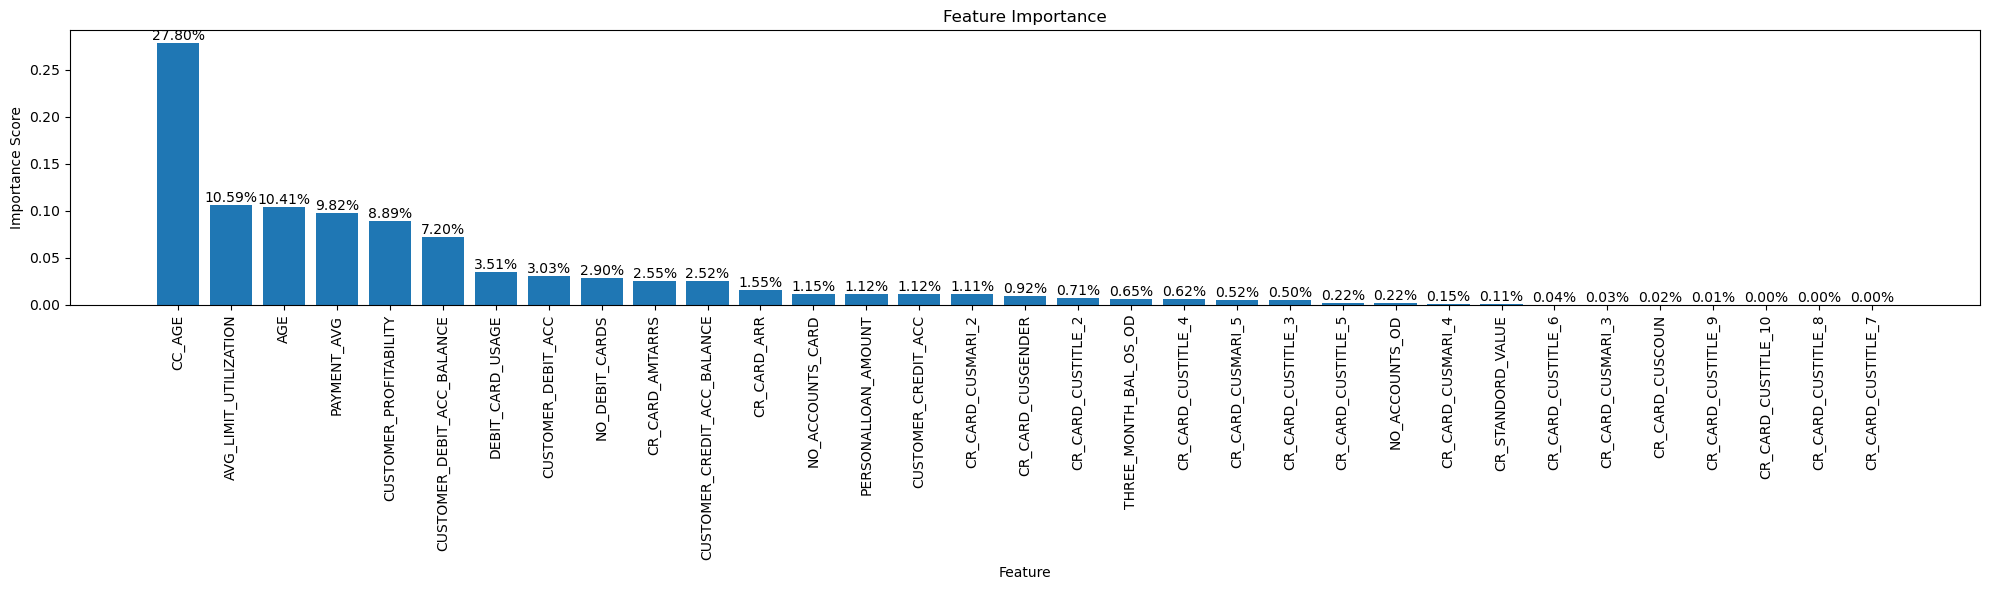

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_resample.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20, 6))
plt.title("Feature Importance")
bars = plt.bar(range(X_train_resample.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train_resample.shape[1]), names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()

# Annotate each bar with its importance percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2%}", ha="center", va="bottom")

plt.show()


In [65]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1,100,5)]
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3,5]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 25, 50, 75, 100], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [3, 5], 'criterion': ['entropy', 'gini']}


In [66]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=5,cv=4,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_resample,y_train_resample)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 25, 50, 75, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 1000]},
                   random_state=100, verbose=2)

In [67]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'entropy'}

In [68]:
rf_randomcv

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 25, 50, 75, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 1000]},
                   random_state=100, verbose=2)

In [69]:
best_random_grid=rf_randomcv.best_estimator_

In [70]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'entropy'}

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2 ],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                         [rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1 ],
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators']]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [50], 'max_features': ['auto'], 'min_samples_leaf': [3, 5], 'min_samples_split': [3, [4, 5, 6], 7], 'n_estimators': [800, 900, 1000]}


In [72]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=4,n_jobs=-1,verbose=2)
grid_search.fit(X_train_resample,y_train_resample)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [50],
                         'max_features': ['auto'], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, [4, 5, 6], 7],
                         'n_estimators': [800, 900, 1000]},
             verbose=2)

In [73]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=800)

In [74]:
best_grid=grid_search.best_estimator_

In [75]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=800)

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=800).fit(X_train_resample,y_train_resample)

In [101]:
# Make predictions on the training set
train_predictions = rf_classifier.predict(X_train_resample)

# Make predictions on the test set
test_predictions = rf_classifier.predict(X_test)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
#print(confusion_matrix(y_train_resample, train_predictions))
print(accuracy_score(y_train_resample, train_predictions))
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
#print(confusion_matrix(y_test, test_predictions))
print(accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Training Set:
0.9912734525961479
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16043
           1       1.00      0.98      0.99     16043

    accuracy                           0.99     32086
   macro avg       0.99      0.99      0.99     32086
weighted avg       0.99      0.99      0.99     32086

Test Set:
0.8902586091384161
              precision    recall  f1-score   support

           0       0.32      0.31      0.32       610
           1       0.94      0.94      0.94      6853

    accuracy                           0.89      7463
   macro avg       0.63      0.63      0.63      7463
weighted avg       0.89      0.89      0.89      7463



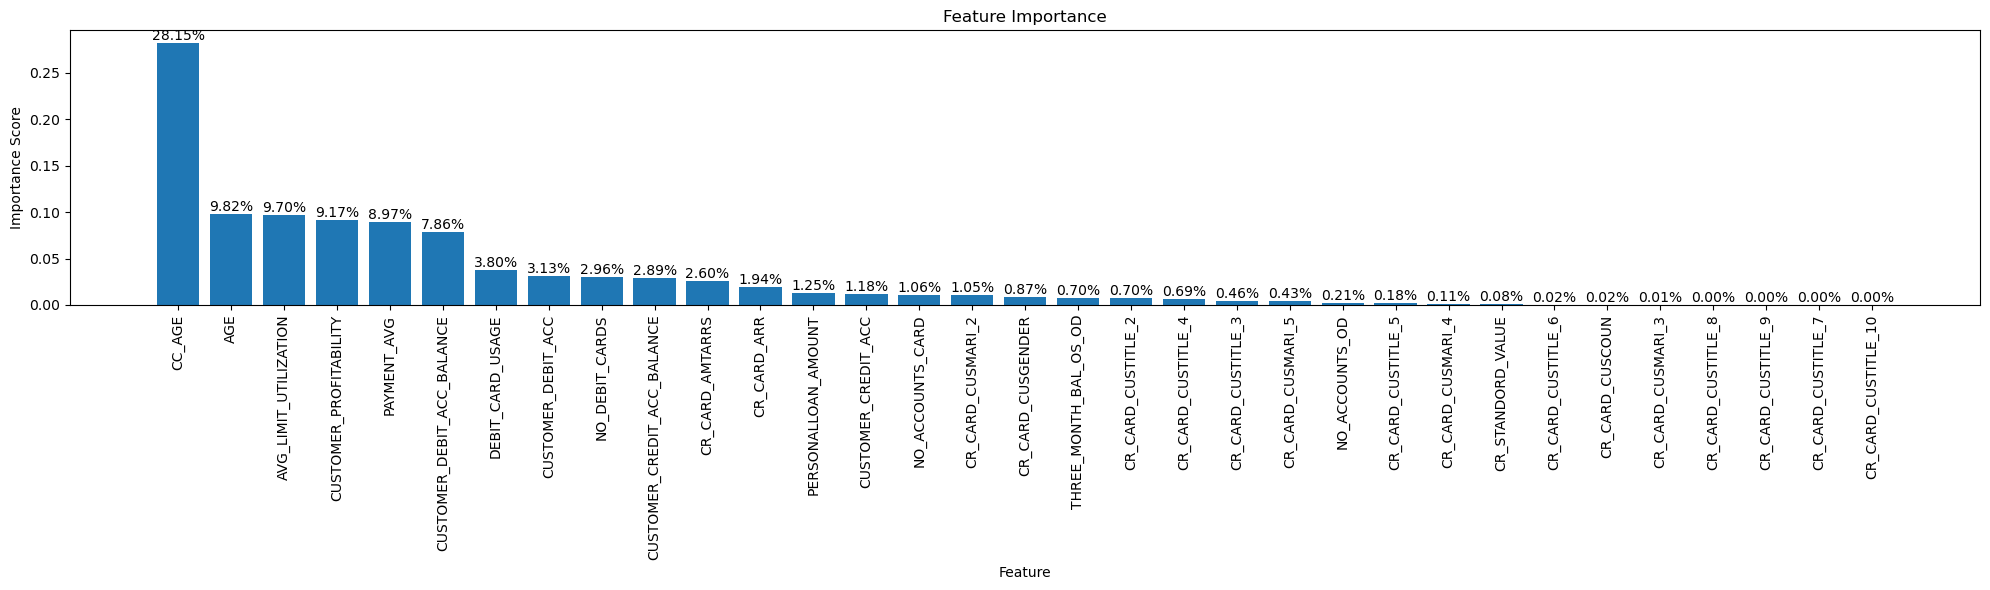

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_resample.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20, 6))
plt.title("Feature Importance")
bars = plt.bar(range(X_train_resample.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train_resample.shape[1]), names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()

# Annotate each bar with its importance percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2%}", ha="center", va="bottom")

plt.show()


In [103]:
selected_feat_random_forest = df_mm[['CC_AGE','CUSTOMER_PROFITABILITY','AGE','PAYMENT_AVG','AVG_LIMIT_UTILIZATION','CUSTOMER_DEBIT_ACC_BALANCE','CR_CARD_OVERDUE_STATUS']]

In [104]:
selected_feat_random_forest.head()

CC_AGE  CUSTOMER_PROFITABILITY     AGE  PAYMENT_AVG  \
0  0.970968                0.542052  0.7750     0.005120   
1  0.967742                0.542065  0.5625     0.005313   
2  0.967742                0.542187  0.5375     0.005120   
3  0.964516                0.542085  0.4750     0.005124   
4  0.964516                0.542101  0.5250     0.005123   

   AVG_LIMIT_UTILIZATION  CUSTOMER_DEBIT_ACC_BALANCE  CR_CARD_OVERDUE_STATUS  
0               0.007264                    0.000000                       1  
1               0.020468                    0.000000                       1  
2               0.000613                    0.000031                       1  
3               0.084698                    0.000112                       1  
4               0.026025                    0.000024                       1

In [105]:
X_R= selected_feat_random_forest.drop('CR_CARD_OVERDUE_STATUS', axis=1)
y_R= selected_feat_random_forest['CR_CARD_OVERDUE_STATUS']
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_R, y_R, test_size=0.3, random_state=42)

In [106]:
# Step 3: Apply SMOTE to the training set

from imblearn.over_sampling import RandomOverSampler
over_sm = RandomOverSampler(random_state=42)
X_train_resample_R, y_train_resample_R = over_sm.fit_resample(X_train_R, y_train_R)

In [184]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=5, min_samples_split=3,
                       n_estimators=300).fit(X_train_resample_R,y_train_resample_R)

In [185]:
# Make predictions on the training set
train_predictions = rf_classifier.predict(X_train_resample_R)

# Make predictions on the test set
test_predictions = rf_classifier.predict(X_test_R)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
#print(confusion_matrix(y_train_resample_R, train_predictions))
print(accuracy_score(y_train_resample_R, train_predictions))
print(classification_report(y_train_resample_R, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
#print(confusion_matrix(y_test_R, test_predictions))
print(accuracy_score(y_test_R, test_predictions))
print(classification_report(y_test_R, test_predictions))

Training Set:
0.9407218101352615
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     16043
           1       1.00      0.88      0.94     16043

    accuracy                           0.94     32086
   macro avg       0.95      0.94      0.94     32086
weighted avg       0.95      0.94      0.94     32086

Test Set:
0.8197775693420877
              precision    recall  f1-score   support

           0       0.23      0.51      0.32       610
           1       0.95      0.85      0.90      6853

    accuracy                           0.82      7463
   macro avg       0.59      0.68      0.61      7463
weighted avg       0.89      0.82      0.85      7463



In [183]:
# Obtain predicted probabilities for the positive class
train_probabilities = rf_classifier.predict_proba(X_train_resample_R)[:, 1]
test_probabilities = rf_classifier.predict_proba(X_test_R)[:, 1]

# Adjust the threshold
threshold = 0.7# Example threshold value
train_predictions = (train_probabilities > threshold).astype(int)
test_predictions = (test_probabilities > threshold).astype(int)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
#print(confusion_matrix(y_train_resample_R, train_predictions))
print(accuracy_score(y_train_resample_R, train_predictions))
print(classification_report(y_train_resample_R, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
#print(confusion_matrix(y_test_R, test_predictions))
print(accuracy_score(y_test_R, test_predictions))
print(classification_report(y_test_R, test_predictions))

Training Set:
0.7903135323817241
              precision    recall  f1-score   support

           0       0.71      0.99      0.83     16043
           1       0.99      0.59      0.74     16043

    accuracy                           0.79     32086
   macro avg       0.85      0.79      0.78     32086
weighted avg       0.85      0.79      0.78     32086

Test Set:
0.6006967707356291
              precision    recall  f1-score   support

           0       0.16      0.89      0.27       610
           1       0.98      0.58      0.73      6853

    accuracy                           0.60      7463
   macro avg       0.57      0.73      0.50      7463
weighted avg       0.92      0.60      0.69      7463



#### xg boost

In [86]:
import xgboost as xgb


In [87]:
xg_boost = xgb.XGBClassifier()
xg_boost.fit(X_train_resample,y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
# Make predictions on the training set
train_predictions = xg_boost.predict(X_train_resample)

# Make predictions on the test set
test_predictions = xg_boost.predict(X_test)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
#print(confusion_matrix(y_train_resample, train_predictions))
print(accuracy_score(y_train_resample, train_predictions))
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
#print(confusion_matrix(y_test, test_predictions))
print(accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Training Set:
0.9421242909680234
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     16043
           1       0.99      0.90      0.94     16043

    accuracy                           0.94     32086
   macro avg       0.95      0.94      0.94     32086
weighted avg       0.95      0.94      0.94     32086

Test Set:
0.8232614230202332
              precision    recall  f1-score   support

           0       0.22      0.47      0.30       610
           1       0.95      0.85      0.90      6853

    accuracy                           0.82      7463
   macro avg       0.59      0.66      0.60      7463
weighted avg       0.89      0.82      0.85      7463



In [89]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [300,600],  # Number of boosting rounds
    'max_depth': [5,6],            # Maximum depth of a tree
    'learning_rate': [0.05,0.1],# Learning rate
    'subsample': [0.8,0.9],      # Subsample ratio of the training instance
    'colsample_bytree': [0.6,0.7, 0.8]# Subsample ratio of columns when constructing each tree
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xg_boost, param_grid=param_grid, cv=2, n_jobs=-1, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_resample, y_train_resample)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_
best_estimator


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 600, 'subsample': 0.8}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [90]:
xg_boost = xgb.XGBClassifier(colsample_bytree = 0.8, learning_rate= 0.1, max_depth= 6, n_estimators= 600, subsample= 0.8)
xg_boost.fit(X_train_resample,y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
# Make predictions on the training set
train_predictions = xg_boost.predict(X_train_resample)

# Make predictions on the test set
test_predictions = xg_boost.predict(X_test)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
#print(confusion_matrix(y_train_resample, train_predictions))
print(accuracy_score(y_train_resample, train_predictions))
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
#print(confusion_matrix(y_test, test_predictions))
print(accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Training Set:
0.9890294832637287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16043
           1       1.00      0.98      0.99     16043

    accuracy                           0.99     32086
   macro avg       0.99      0.99      0.99     32086
weighted avg       0.99      0.99      0.99     32086

Test Set:
0.8783331100093796
              precision    recall  f1-score   support

           0       0.29      0.33      0.30       610
           1       0.94      0.93      0.93      6853

    accuracy                           0.88      7463
   macro avg       0.61      0.63      0.62      7463
weighted avg       0.89      0.88      0.88      7463



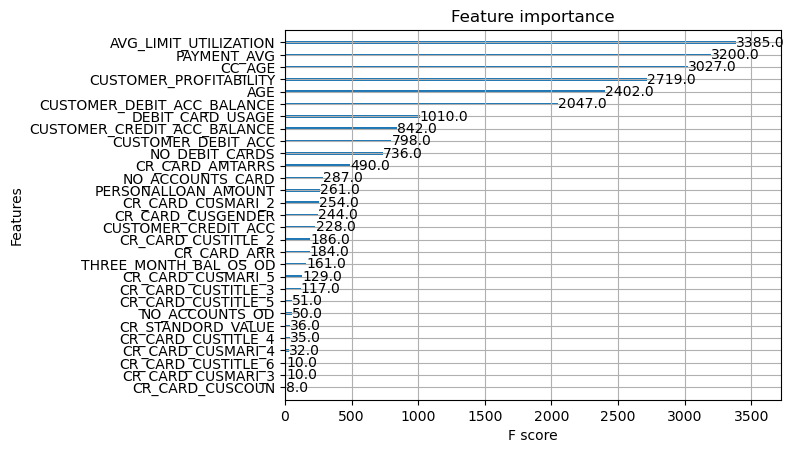

In [92]:
from numpy import loadtxt
from xgboost import XGBClassifier, plot_importance
from matplotlib import pyplot

# fit model no training data

# plot feature importance
plot_importance(xg_boost)
pyplot.show()


In [93]:
selected_feat_xg_boost = df_mm[['CC_AGE','AGE','AVG_LIMIT_UTILIZATION','CUSTOMER_PROFITABILITY','CUSTOMER_DEBIT_ACC_BALANCE',
                                'PAYMENT_AVG','CR_CARD_OVERDUE_STATUS']]

In [94]:
selected_feat_xg_boost.head()

CC_AGE     AGE  AVG_LIMIT_UTILIZATION  CUSTOMER_PROFITABILITY  \
0  0.970968  0.7750               0.007264                0.542052   
1  0.967742  0.5625               0.020468                0.542065   
2  0.967742  0.5375               0.000613                0.542187   
3  0.964516  0.4750               0.084698                0.542085   
4  0.964516  0.5250               0.026025                0.542101   

   CUSTOMER_DEBIT_ACC_BALANCE  PAYMENT_AVG  CR_CARD_OVERDUE_STATUS  
0                    0.000000     0.005120                       1  
1                    0.000000     0.005313                       1  
2                    0.000031     0.005120                       1  
3                    0.000112     0.005124                       1  
4                    0.000024     0.005123                       1

In [95]:
X_B= selected_feat_xg_boost.drop('CR_CARD_OVERDUE_STATUS', axis=1)
y_B= selected_feat_xg_boost['CR_CARD_OVERDUE_STATUS']
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

In [96]:
from imblearn.over_sampling import RandomOverSampler
over_sm_B = RandomOverSampler(random_state=42)
X_train_resample_B, y_train_resample_B = over_sm_B.fit_resample(X_train_B, y_train_B)

In [97]:
xg_boost = xgb.XGBClassifier(colsample_bytree = 0.8, learning_rate= 0.06, max_depth= 6, n_estimators= 600, subsample= 0.8)
xg_boost.fit(X_train_resample_B,y_train_resample_B)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
# Make predictions on the training set
train_predictions = xg_boost.predict(X_train_resample_B)

# Make predictions on the test set
test_predictions = xg_boost.predict(X_test_B)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
#print(confusion_matrix(y_train_resample_B, train_predictions))
print(accuracy_score(y_train_resample_B, train_predictions))
print(classification_report(y_train_resample_B, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
#print(confusion_matrix(y_test_B, test_predictions))
print(accuracy_score(y_test_B, test_predictions))
print(classification_report(y_test_B, test_predictions))

Training Set:
0.9630056722558125
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16043
           1       1.00      0.93      0.96     16043

    accuracy                           0.96     32086
   macro avg       0.97      0.96      0.96     32086
weighted avg       0.97      0.96      0.96     32086

Test Set:
0.840412702666488
              precision    recall  f1-score   support

           0       0.24      0.43      0.31       610
           1       0.95      0.88      0.91      6853

    accuracy                           0.84      7463
   macro avg       0.59      0.66      0.61      7463
weighted avg       0.89      0.84      0.86      7463



In [99]:
# Obtain predicted probabilities for the positive class
train_probabilities = xg_boost.predict_proba(X_train_resample_B)[:, 1]
test_probabilities = xg_boost.predict_proba(X_test_B)[:, 1]

# Adjust the threshold
threshold = 0.55 # Example threshold value
train_predictions = (train_probabilities > threshold).astype(int)
test_predictions = (test_probabilities > threshold).astype(int)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
#print(confusion_matrix(y_train_resample_B, train_predictions))
print(accuracy_score(y_train_resample_B, train_predictions))
print(classification_report(y_train_resample_B, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
#print(confusion_matrix(y_test_B, test_predictions))
print(accuracy_score(y_test_B, test_predictions))
print(classification_report(y_test_B, test_predictions))


Training Set:
0.9527831452970142
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16043
           1       1.00      0.91      0.95     16043

    accuracy                           0.95     32086
   macro avg       0.96      0.95      0.95     32086
weighted avg       0.96      0.95      0.95     32086

Test Set:
0.8250033498593059
              precision    recall  f1-score   support

           0       0.23      0.49      0.31       610
           1       0.95      0.86      0.90      6853

    accuracy                           0.83      7463
   macro avg       0.59      0.67      0.61      7463
weighted avg       0.89      0.83      0.85      7463

